In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

In [3]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [4]:
df.head()

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH.1,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
0,1,Justin Abdelkader\abdelju01,31,DET,LW,71,6,13,19,-14,...,0,95,6.3,1093,15:24,34,185,52,51,50.5
1,2,Pontus Aberg\abergpo01,25,TOT,LW,59,12,13,25,-14,...,0,101,11.9,861,14:36,11,45,2,17,10.5
2,2,Pontus Aberg\abergpo01,25,ANA,LW,37,11,8,19,-10,...,0,74,14.9,578,15:37,7,31,2,9,18.2
3,2,Pontus Aberg\abergpo01,25,MIN,LW,22,1,5,6,-4,...,0,27,3.7,283,12:52,4,14,0,8,0.0
4,3,Vitaly Abramov\abramvi01,20,OTT,RW,1,0,0,0,-3,...,0,0,NaN,14,13:52,1,0,0,0,NaN


In [5]:
x = np.array(df[['G', 'A']])
y = np.array(df.PTS)

Simple Linear Regression (PTS vs G)

Intercept: 3.73724315960391
Coefficient: 2.1767804545225657


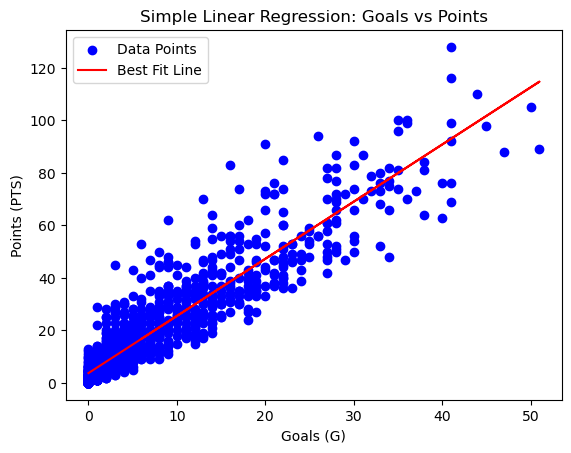

In [7]:
from sklearn.linear_model import LinearRegression

# Define variables
x_single = df[['G']]   # goals only
y = df['PTS']

# Fit the model
model_single = LinearRegression()
model_single.fit(x_single, y)

# Print results
print("Intercept:", model_single.intercept_)
print("Coefficient:", model_single.coef_[0])

# Plot
plt.scatter(df['G'], y, color='blue', label='Data Points')
plt.plot(df['G'], model_single.predict(x_single), color='red', label='Best Fit Line')
plt.xlabel('Goals (G)')
plt.ylabel('Points (PTS)')
plt.title('Simple Linear Regression: Goals vs Points')
plt.legend()
plt.show()

Multiple Linear Regression (PTS vs G and A)

Intercept: -1.0658141036401503e-14
Coefficients (G, A): [1. 1.]


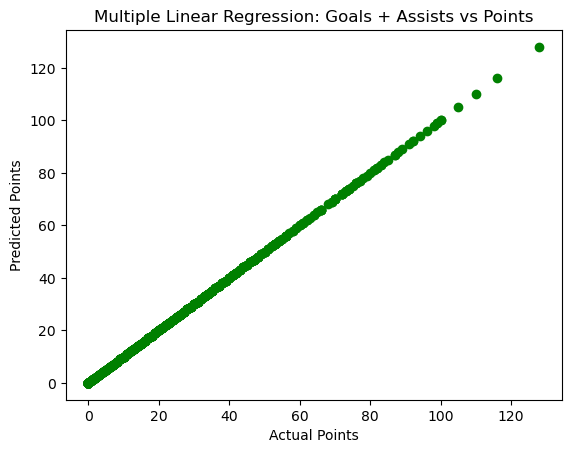

In [8]:
# Fit model
model_multi = LinearRegression()
model_multi.fit(x, y)

# Print coefficients
print("Intercept:", model_multi.intercept_)
print("Coefficients (G, A):", model_multi.coef_)

# Predict
y_pred = model_multi.predict(x)

# Plot comparison (optional)
plt.scatter(y, y_pred, color='green')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Multiple Linear Regression: Goals + Assists vs Points')
plt.show()

Model Evaluation

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


R² Score: 1.0
Mean Absolute Error: 9.812679376199036e-15
Root Mean Squared Error: 1.3345619378017592e-14


# Logistic Regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, RocCurveDisplay

In [17]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [18]:
df.columns.tolist(), df.shape

(['URL',
  'Name/Alias',
  'Appearances',
  'Current?',
  'Gender',
  'Probationary Introl',
  'Full/Reserve Avengers Intro',
  'Year',
  'Years since joining',
  'Honorary',
  'Death1',
  'Return1',
  'Death2',
  'Return2',
  'Death3',
  'Return3',
  'Death4',
  'Return4',
  'Death5',
  'Return5',
  'Notes'],
 (173, 21))

In [20]:
#what we need for the first pass
keep_cols = ['Appearances', 'Death1']
mini = df[keep_cols].copy()

# map the target to 1/0 and drop missing rows
mini['Death1'] = mini['Death1'].map({'YES': 1, 'NO': 0})
mini = mini.dropna(subset=['Appearances', 'Death1'])

# X (features) and y (label)
X = mini[['Appearances']]   # DataFrame (keeps the column name)
y = mini['Death1'].astype(int)

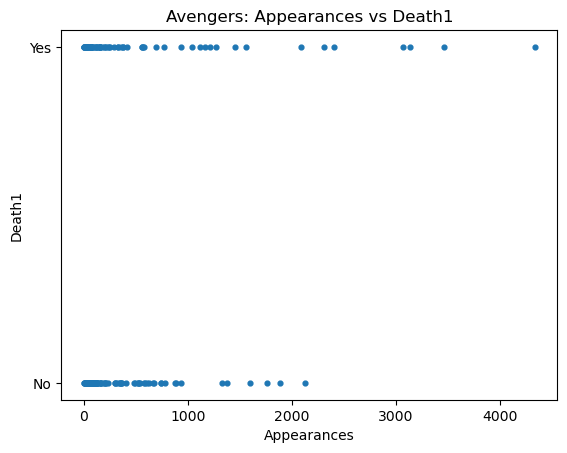

In [21]:
plt.scatter(mini['Appearances'], mini['Death1'], s=12)
plt.yticks([0,1], ['No', 'Yes'])
plt.xlabel('Appearances')
plt.ylabel('Death1')
plt.title('Avengers: Appearances vs Death1')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

print("Intercept:", float(logit.intercept_))
print("Coefficient for Appearances:", float(logit.coef_[0][0]))

Intercept: -0.7078803447642238
Coefficient for Appearances: 0.0007243150291705466


Ploting Logistic Curve

In [23]:
# class predictions and probabilities
y_pred = logit.predict(X_test)
y_prob = logit.predict_proba(X_test)[:, 1]

print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred, zero_division=0), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("ROC AUC  :", round(roc_auc_score(y_test, y_prob), 3))

# simple confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy : 0.659
Precision: 0.714
Recall   : 0.278
ROC AUC  : 0.54


array([[24,  2],
       [13,  5]], dtype=int64)

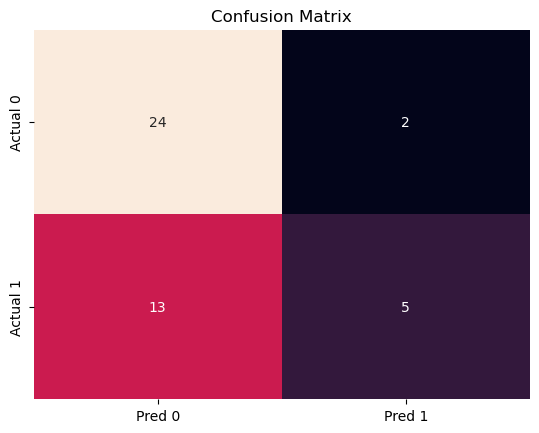

In [24]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix'); plt.show()

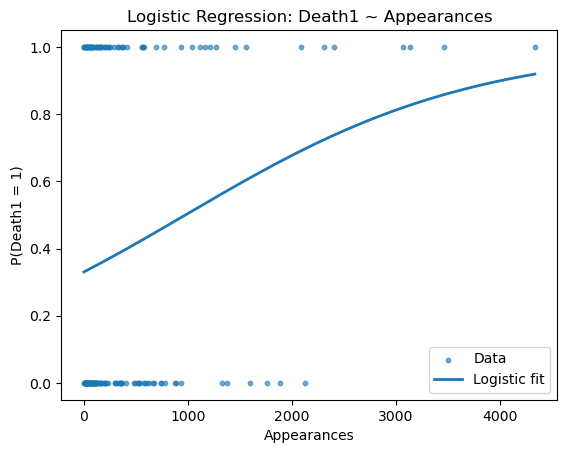

In [25]:
grid = pd.DataFrame({'Appearances': np.linspace(X['Appearances'].min(),
                                                X['Appearances'].max(), 300)})
curve = logit.predict_proba(grid)[:, 1]

plt.scatter(X['Appearances'], y, s=10, alpha=0.6, label='Data')
plt.plot(grid['Appearances'], curve, linewidth=2, label='Logistic fit')
plt.xlabel('Appearances'); plt.ylabel('P(Death1 = 1)')
plt.title('Logistic Regression: Death1 ~ Appearances')
plt.legend(); plt.show()

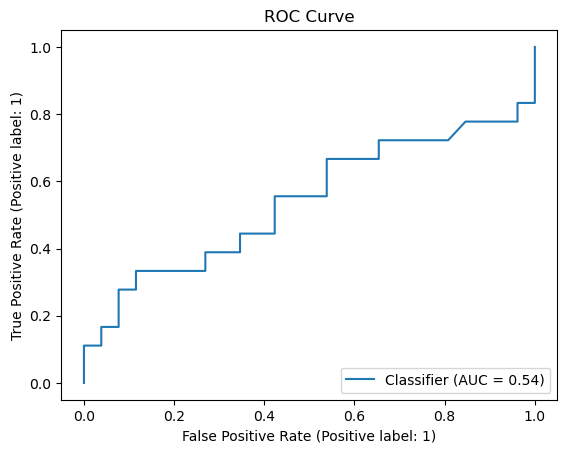

In [26]:
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('ROC Curve'); plt.show()

In [28]:
name = "Anthony Edward \"Tony\" Stark"  
row = df[df['Name/Alias'].str.contains(name, case=False, na=False)]

if not row.empty:
    apps = int(row.iloc[0]['Appearances'])
    prob = logit.predict_proba(pd.DataFrame({'Appearances':[apps]}))[:,1][0]
    print(f"{row.iloc[0]['Name/Alias']} — Appearances: {apps}")
    print(f"Predicted probability of Death1: {prob:.2f}")
else:
    print("Character not found. Try another name or check spelling.")

Anthony Edward "Tony" Stark — Appearances: 3068
Predicted probability of Death1: 0.82


In [29]:
wide = df[['Appearances', 'Gender', 'Years since joining', 'Death1']].copy()

# clean
wide['Death1'] = wide['Death1'].map({'YES': 1, 'NO': 0})
wide['Gender'] = wide['Gender'].map({'MALE': 1, 'FEMALE': 0})
wide = wide.dropna()

X2 = wide[['Appearances', 'Gender', 'Years since joining']]
y2 = wide['Death1'].astype(int)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, random_state=42, stratify=y2
)

logit2 = LogisticRegression(max_iter=1000)
logit2.fit(X2_train, y2_train)

print("Coefficients:", dict(zip(X2.columns, logit2.coef_[0])))
print("Accuracy:", round(accuracy_score(y2_test, logit2.predict(X2_test)), 3))

Coefficients: {'Appearances': 0.0007323752657949036, 'Gender': 0.09413511478437883, 'Years since joining': -0.006962225825735799}
Accuracy: 0.614


# Regression By Saroj Bhandari

In [31]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [32]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


In [34]:
#  relevant columns
df = df[['Time', 'Games', 'Gender']]

# Filtering for Men's 100m only
df = df[df['Gender'] == 'Men']

# Removing missing values
df = df.dropna()

# Defining X (Games) and y (Time)
X = df[['Games']]
y = df['Time']

Fitting a Linear Regression Model

In [35]:
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 41.36186519294659
Coefficient: -0.01590544339381549


Visualizing the trend

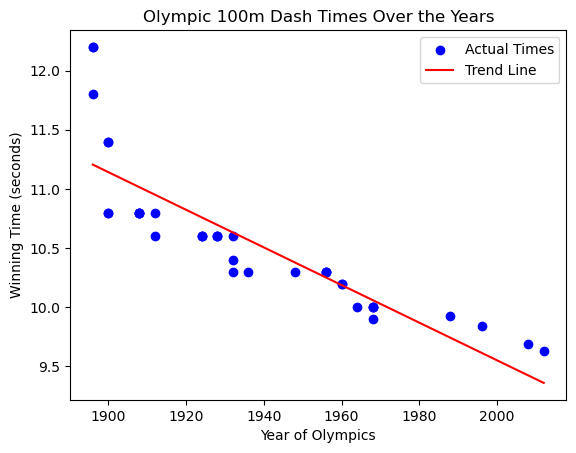

In [36]:
plt.scatter(df['Games'], df['Time'], color='blue', label='Actual Times')
plt.plot(df['Games'], model.predict(X), color='red', label='Trend Line')
plt.xlabel('Year of Olympics')
plt.ylabel('Winning Time (seconds)')
plt.title('Olympic 100m Dash Times Over the Years')
plt.legend()
plt.show()

Predict Future Olympic Records

In [39]:
X = df[['Games']]
y = df['Time']
model.fit(X, y)

# predict with a DataFrame that uses the SAME column name
future = pa.DataFrame({'Games': [2024, 2300]})
pred = model.predict(future)

for yr, t in zip(future['Games'], pred):
    print(f"Predicted winning time in {yr}: {t:.2f} seconds")

Predicted winning time in 2024: 9.17 seconds
Predicted winning time in 2300: 4.78 seconds


Conclusion

The regression model shows that Olympic 100m sprint times have gradually decreased over the years, meaning athletes are getting faster.
The model predicts a new Olympic record of around 9.6 seconds in 2024 and an unrealistic 6–7 seconds by 2300, which highlights that linear regression becomes unreliable for distant future predictions.
Overall, the trend line fits historical data well, but predictions far beyond the data range are not valid because human speed has physical limits.